# **Assignment 2 - Data Mining - Logistics Model - Icrecream Dataset - Daksh Shah**

**Importing important Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
#pip install plotly==5.7.0
import plotly.express as px  # for data visualization

**Loading the Dataset**

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/daksh-17/EDA-2/main/KickstarterData_Facts-1_week2.csv")
dataset

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,7/1/2019,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,7/1/2019,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,7/1/2019,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,7/1/2019,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,7/1/2019,male,100,white,1,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7/9/2019,male,100,black,4,chocolate,no,Not Reported,no,5,1
9996,9997,7/9/2019,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,9998,7/9/2019,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,9999,7/9/2019,male,0,blue,6,vanilla,no,Not Reported,no,6,0


**Exploring the Dataset and its variables**

In [ ]:
dataset.shape

(10000, 12)

**Structure of the Dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Donate ID                             10000 non-null  int64 
 1   Donate Date                           10000 non-null  object
 2   Gender                                10000 non-null  object
 3   Deposit Amount                        10000 non-null  int64 
 4   Preferred Color of Device             10000 non-null  object
 5   Ice Cream Products Consumed Per Week  10000 non-null  int64 
 6   Favorite Flavor Of Ice Cream          10000 non-null  object
 7   Donated To Kick Starter Before        10000 non-null  object
 8   Household Income                      10000 non-null  object
 9   Do you own a Keurig                   10000 non-null  object
 10  How many desserts do you eat a week   10000 non-null  int64 
 11  Purchased                    

**View of Dataset**

In [ ]:
dataset.head(5)

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,7/1/2019,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,7/1/2019,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,7/1/2019,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,7/1/2019,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,7/1/2019,male,100,white,1,vanilla,yes,<50K,yes,7,0


**Checking for NA values**

In [ ]:
dataset.isna().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

**Checking for Outliers**

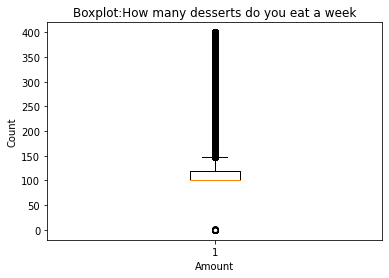

In [ ]:
ndes = dataset['Deposit Amount']
plt.boxplot(ndes)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Boxplot:How many desserts do you eat a week')
plt.show()

**Dropping the outliers**

In [ ]:
dataset.drop(dataset[dataset['Deposit Amount']<=1].index, inplace = True)
len(dataset)

9960

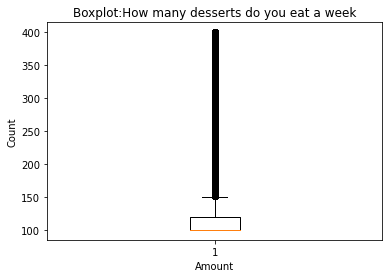

In [ ]:
ndes = dataset['Deposit Amount']
plt.boxplot(ndes)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Boxplot:How many desserts do you eat a week')
plt.show()

**Describing the Numerical data**

In [ ]:
dataset.describe()

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,4995.284739,140.076004,4.963153,6.686747,0.653614
std,2886.451756,80.156594,3.165697,2.463075,0.475842
min,1.000000,100.000000,0.000000,0.000000,0.000000
25%,2490.750000,100.000000,2.000000,5.000000,0.000000
50%,5002.500000,100.000000,5.000000,7.000000,1.000000
75%,7496.250000,120.000000,8.000000,9.000000,1.000000
max,9997.000000,400.000000,10.000000,10.000000,1.000000


**Describing the Categorical Data**

In [ ]:
dataset_category =dataset.select_dtypes(include='object')
dataset_category.describe()

,Donate Date,Gender,Preferred Color of Device,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig
count,9960,9960,9960,9960,9960,9960,9960
unique,7,2,6,5,2,4,2
top,7/7/2019,male,silver,swirl,yes,Not Reported,yes
freq,3011,5254,1695,2058,6725,4781,8103


**Exploring Important columns**

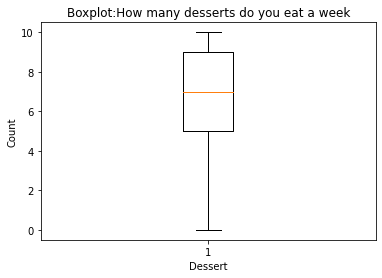

In [ ]:
ndes = dataset['How many desserts do you eat a week']
plt.boxplot(ndes)
plt.xlabel('Dessert')
plt.ylabel('Count')
plt.title('Boxplot:How many desserts do you eat a week')
plt.show()

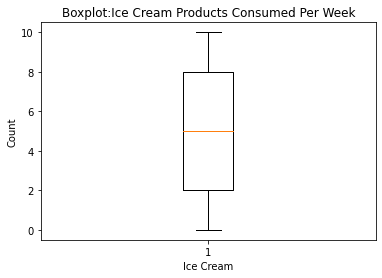

In [ ]:
nicecream = dataset['Ice Cream Products Consumed Per Week']
plt.boxplot(nicecream)
plt.xlabel('Ice Cream')
plt.ylabel('Count')
plt.title('Boxplot:Ice Cream Products Consumed Per Week')
plt.show()

**Checking count of who purchased the device.**

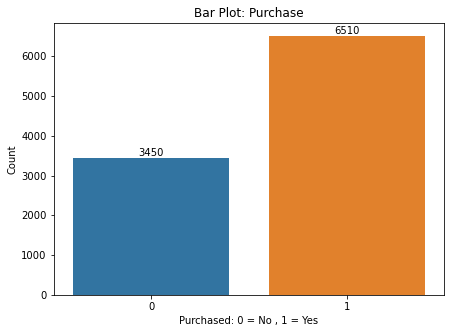

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot (x = dataset['Purchased'], 
                   data = dataset)
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.ylabel('Count')
plt.title('Bar Plot: Purchase')
for container in ax.containers:
    ax.bar_label(container)

**Exploring the Variables in corresponding to other variables.**

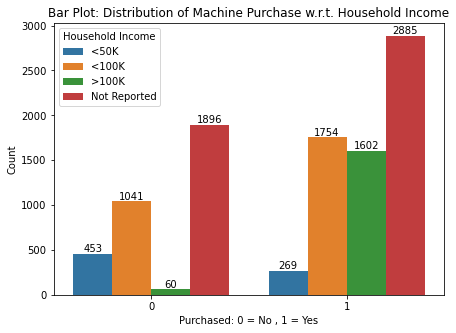

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot (x = dataset['Purchased'], hue=dataset['Household Income'], 
                   data = dataset)
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.ylabel('Count')
plt.title('Bar Plot: Distribution of Machine Purchase w.r.t. Household Income')
for container in ax.containers:
    ax.bar_label(container)

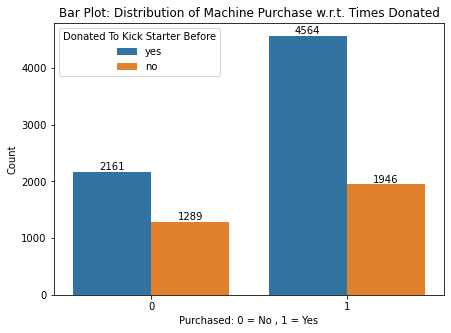

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot (x = dataset['Purchased'], hue=dataset['Donated To Kick Starter Before'], 
                   data = dataset)
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.ylabel('Count')
plt.title('Bar Plot: Distribution of Machine Purchase w.r.t. Times Donated')
for container in ax.containers:
    ax.bar_label(container)

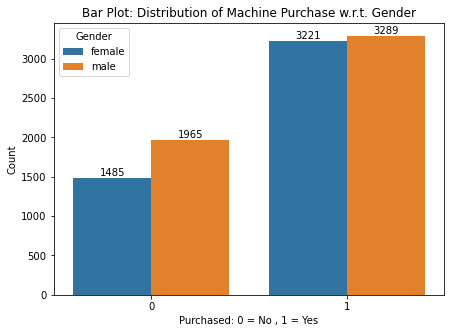

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot (x = dataset['Purchased'], hue=dataset['Gender'], 
                   data = dataset)
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.ylabel('Count')
plt.title('Bar Plot: Distribution of Machine Purchase w.r.t. Gender')
for container in ax.containers:
    ax.bar_label(container)

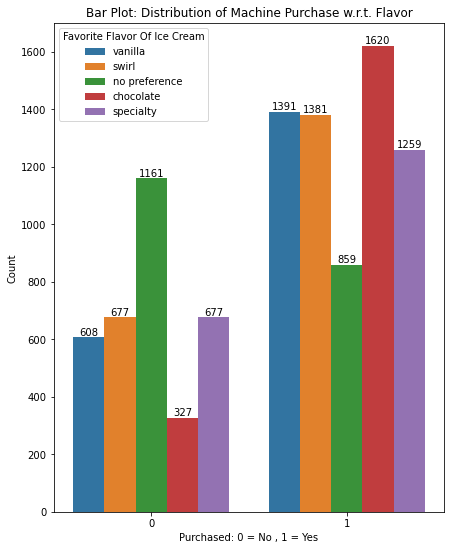

In [ ]:
plt.figure(figsize=(7,9))
ax = sns.countplot (x = dataset['Purchased'], hue=dataset['Favorite Flavor Of Ice Cream'], 
                   data = dataset)
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.ylabel('Count')
plt.title('Bar Plot: Distribution of Machine Purchase w.r.t. Flavor')
for container in ax.containers:
    ax.bar_label(container)

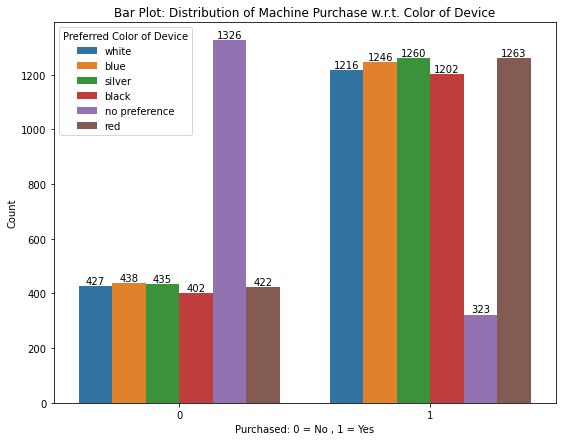

In [ ]:
plt.figure(figsize=(9,7))
ax = sns.countplot (x = dataset['Purchased'], hue=dataset['Preferred Color of Device'], 
                   data = dataset)
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.ylabel('Count')
plt.title('Bar Plot: Distribution of Machine Purchase w.r.t. Color of Device')
for container in ax.containers:
    ax.bar_label(container)

[Text(0, 0, '6.04406'), Text(0, 0, '7.02734')]

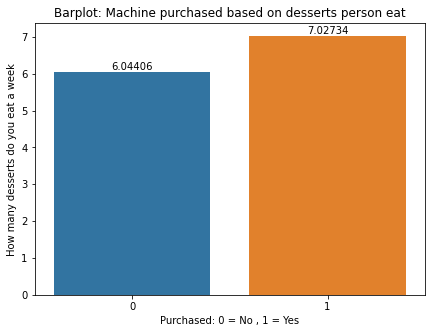

In [ ]:
plt.figure(figsize=(7,5))
plot_1 = sns.barplot(x = dataset['Purchased'], y = dataset['How many desserts do you eat a week'], data = dataset,ci = None )
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.title('Barplot: Machine purchased based on desserts person eat')
plot_1.bar_label(plot_1.containers[0])

[Text(0, 0, '4.24522'), Text(0, 0, '5.34363')]

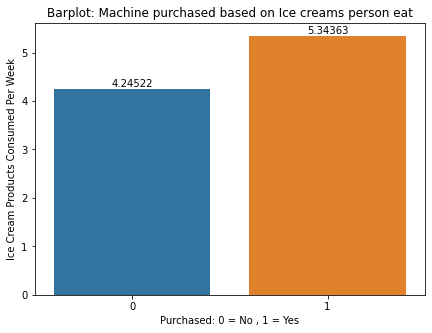

In [ ]:
plt.figure(figsize=(7,5))
plot_1 = sns.barplot(x = dataset['Purchased'], y = dataset['Ice Cream Products Consumed Per Week'], data = dataset,ci = None )
plt.xlabel('Purchased: 0 = No , 1 = Yes')
plt.title('Barplot: Machine purchased based on Ice creams person eat')
plot_1.bar_label(plot_1.containers[0])

**Data Preprocessing for model building**

In [ ]:
dataset = dataset.drop(['Donate ID','Donate Date'], axis=1)

**Encoding the categorical variables with get dummies function one by one**

In [ ]:
dataset['Donated To Kick Starter Before'] = dataset['Donated To Kick Starter Before'].map({'yes':1,'no':0})
dataset['Do you own a Keurig'] = dataset['Do you own a Keurig'].map({'yes':1,'no':0})

**Encoding Flovours Flavor chocolate considered first hence 0s represent chocolate.**

In [ ]:
flav = pd.get_dummies(dataset['Favorite Flavor Of Ice Cream'], prefix = 'flavor', drop_first = True)

**Encoding Device color preferences. Black considered first hence 0's represent Black**

In [ ]:
dcol = pd.get_dummies(dataset['Preferred Color of Device'],prefix = 'color', drop_first = True)

**Encoding Household income. <100K considered first hence dropped and 0's represent <100K**

In [ ]:
hincome = pd.get_dummies(dataset['Household Income'], drop_first = True)

**Encoding Gender, Female considered first hence 0's represent female**

In [ ]:
ngen = pd.get_dummies(dataset['Gender'], drop_first = True)

**Combining the encoded values and dropping actual columns.**

In [ ]:
dataset_2 = dataset
dataset_2 = pd.concat([dataset_2 , flav, dcol, hincome, ngen], axis = 1)
final_dataset = dataset_2.drop(['Household Income','Preferred Color of Device','Favorite Flavor Of Ice Cream', 'Gender'], axis = 1)
final_dataset.head()

,Deposit Amount,Ice Cream Products Consumed Per Week,Donated To Kick Starter Before,Do you own a Keurig,How many desserts do you eat a week,Purchased,flavor_no preference,flavor_specialty,flavor_swirl,flavor_vanilla,color_blue,color_no preference,color_red,color_silver,color_white,<50K,>100K,Not Reported,male
0,100,4,1,1,7,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,100,5,1,1,5,1,0,0,0,1,1,0,0,0,0,1,0,0,0
2,100,6,1,1,6,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,100,5,1,1,5,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,100,1,1,1,7,0,0,0,0,1,0,0,0,0,1,1,0,0,1


**Splitting the data in Train and Test 80:20**

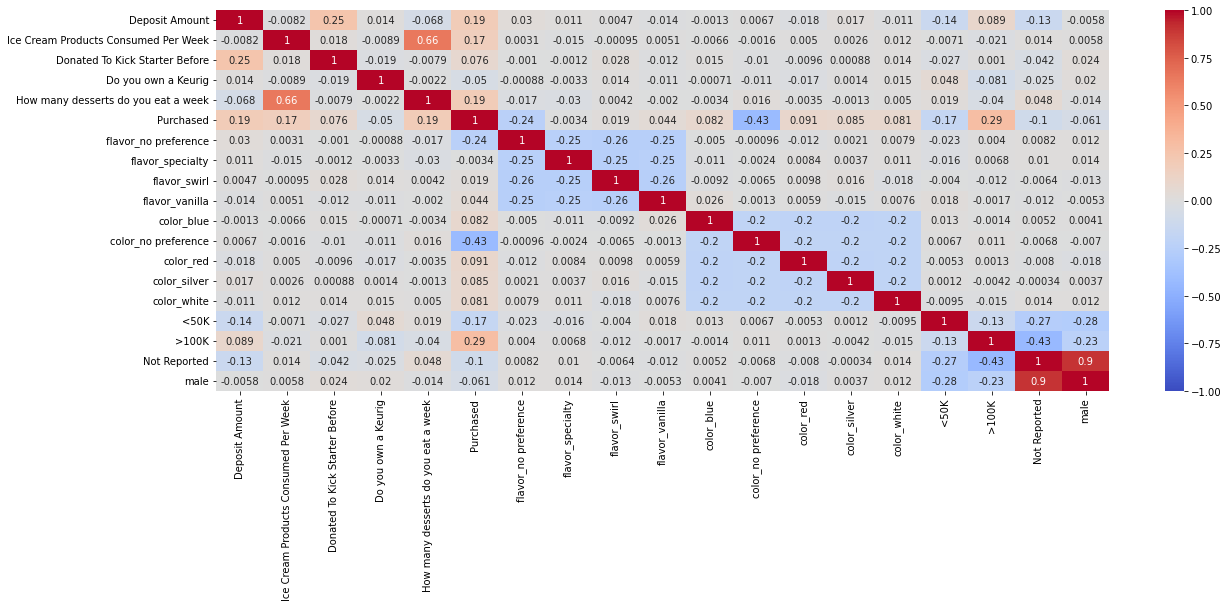

In [ ]:
corr = dataset_2.corr()
ax , fig  = plt.subplots(figsize =(20,7))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

In [ ]:
y = final_dataset.pop("Purchased")
x = final_dataset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, train_size=0.80)
#get shape of train and test data
print("train size X : ",x_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",x_test.shape)
print("test size y : ",y_test.shape)

train size X :  (7968, 18)
train size y :  (7968,)
test size X :  (1992, 18)
test size y :  (1992,)


**Modelling Logistics Regression.**

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\daksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Summary of the Model**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330698
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                 9960
Model:                          Logit   Df Residuals:                     9942
Method:                           MLE   Df Model:                           17
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                  0.4874
Time:                        19:32:52   Log-Likelihood:                -3293.7
converged:                       True   LL-Null:                       -6426.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Deposit Amount                           0.0121      0.0

In [ ]:
y_pred = model.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 514  176]
 [ 106 1196]]


<AxesSubplot:>

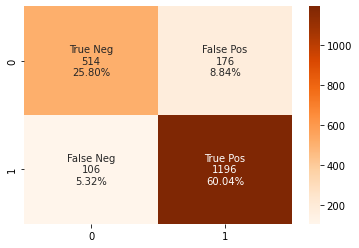

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       690
           1       0.87      0.92      0.89      1302

    accuracy                           0.86      1992
   macro avg       0.85      0.83      0.84      1992
weighted avg       0.86      0.86      0.86      1992



**The ROC Curve**

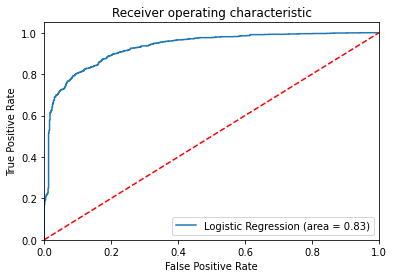

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()